In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import seaborn as sns

In [25]:
df = pd.read_csv("./input/bugzilla.csv")

In [26]:
df.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,3,2001/12/12 17:41,1,1,3,0.579380,0.093620,0.000000,480.666667,1,14,596,0.666667,143,133.50,129,1
1,7,1999/10/12 12:57,1,1,1,0.000000,0.000000,0.000000,398.000000,1,1,0,1.000000,140,140.00,137,1
2,8,2002/5/15 16:55,3,3,52,0.739279,0.183477,0.208913,283.519231,0,23,15836,0.750000,984,818.65,978,0
3,9,2002/1/21 15:37,1,1,8,0.685328,0.016039,0.012880,514.375000,1,21,1281,1.000000,579,479.25,550,0
4,10,2001/12/19 16:44,2,2,38,0.769776,0.091829,0.072746,366.815789,1,21,6565,0.763158,413,313.25,405,0


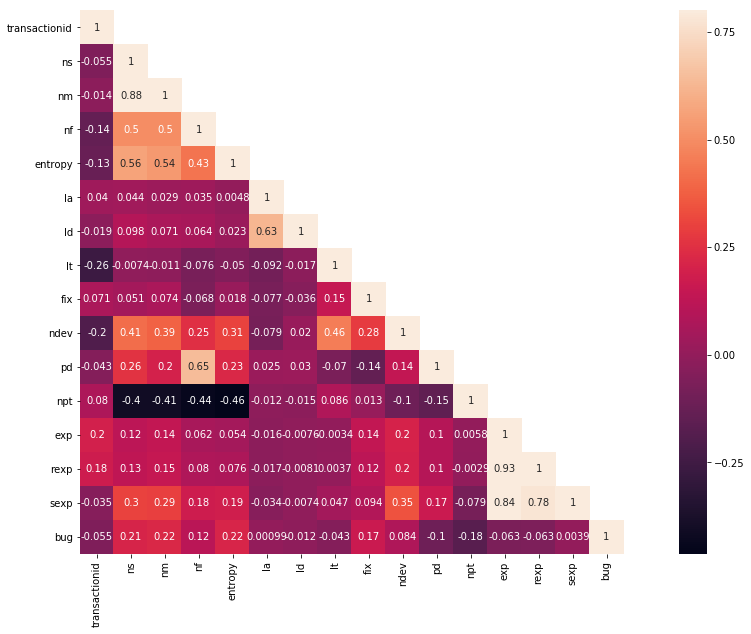

In [27]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [32]:
df["xexp"]  = ((df["exp"] + df["rexp"] + df["sexp"])/3)
df = df.ix[:,[0,1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15, 17, 16]]
df

/Users/kodaihatori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,xexp,bug
0,3,2001/12/12 17:41,1,1,3,0.579380,0.093620,0.000000,480.666667,1,14,596,0.666667,143,133.500000,129,135.166667,1
1,7,1999/10/12 12:57,1,1,1,0.000000,0.000000,0.000000,398.000000,1,1,0,1.000000,140,140.000000,137,139.000000,1
2,8,2002/5/15 16:55,3,3,52,0.739279,0.183477,0.208913,283.519231,0,23,15836,0.750000,984,818.650000,978,926.883333,0
3,9,2002/1/21 15:37,1,1,8,0.685328,0.016039,0.012880,514.375000,1,21,1281,1.000000,579,479.250000,550,536.083333,0
4,10,2001/12/19 16:44,2,2,38,0.769776,0.091829,0.072746,366.815789,1,21,6565,0.763158,413,313.250000,405,377.083333,0
5,12,2002/1/21 15:42,1,1,16,0.760777,0.018308,0.017666,583.750000,1,20,2098,0.750000,595,495.250000,566,552.083333,0
6,13,2001/12/27 2:25,2,2,33,0.816160,0.095682,0.041833,403.484848,0,21,6840,0.727273,548,448.250000,540,512.083333,0
7,15,2001/12/27 0:28,2,2,33,0.816160,0.095682,0.041833,403.484848,1,21,6840,0.727273,482,382.250000,474,446.083333,0
8,19,2002/2/8 9:40,2,2,9,0.650242,0.086558,0.070774,218.222222,0,19,2117,0.555556,24,24.000000,24,24.000000,0
9,27,2003/4/25 1:41,2,2,8,0.795895,0.080952,0.023810,393.750000,1,27,794,0.875000,170,90.500000,169,143.166667,1


In [33]:
X = df.iloc[:, :-1]
dropFeatures = ["exp", "rexp", "sexp", "commitdate"]
X.drop(dropFeatures, axis =1, inplace=True)
y = df.iloc[:, 17]

In [37]:
X.head()

,transactionid,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,xexp
0,3,1,1,3,0.579380,0.093620,0.000000,480.666667,1,14,596,0.666667,135.166667
1,7,1,1,1,0.000000,0.000000,0.000000,398.000000,1,1,0,1.000000,139.000000
2,8,3,3,52,0.739279,0.183477,0.208913,283.519231,0,23,15836,0.750000,926.883333
3,9,1,1,8,0.685328,0.016039,0.012880,514.375000,1,21,1281,1.000000,536.083333
4,10,2,2,38,0.769776,0.091829,0.072746,366.815789,1,21,6565,0.763158,377.083333


In [15]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3234, 15)
(1386, 15)
(3234,)
(1386,)


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_p_lr = lr.predict(X_test)
from sklearn.metrics import confusion_matrix
print("ロジスティック回帰の混合行列", confusion_matrix(y_test, y_p_lr))

print ("ロジスティック回帰での正答率", accuracy_score(y_test, y_p_lr))
#ロジスティック回帰正答率

ロジスティック回帰の混合行列 [[781  94]
 [321 190]]
ロジスティック回帰での正答率 0.7005772005772006


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)
y_p_svm = svm.predict(X_test)
# 正答率を算出
print('SVMでの正答率', accuracy_score(y_test, y_p_svm))
print("ロジスティック回帰の混合行列", confusion_matrix(y_test, y_p_svm))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

list_nn = []
list_score = []
for k in range(1, 5):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    Y_pred = knc.predict(X_test)
    score = knc.score(X_test, y_test)
#     print("[%d] score: {:.2f}".format(score) % k)
    list_nn.append(k)
    list_score.append(score)

#プロット
plt.ylim(0.1, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

#k = 2の時が良い
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train, y_train)
Y_pred = knc.predict(X_test)
score = knc.score(X_test, y_test)
print("knnの混合行列", confusion_matrix(y_test, Y_pred))
print ("knnでの正答率", accuracy_score(y_test, Y_pred))

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D

# coldstart

In [ ]:
# from keras.models import Sequential, Model
# from keras.layers import Dense, Dropout, Activation, Flatten, Add, Input
# from keras.layers.advanced_activations import LeakyReLU
# from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization

# lookback = 5

# #データを4次元化
# X_train = X_train.reshape((len(X_train),lookback,1,1))
# X_val = X_val.reshape((len(X_val),lookback,1,1))
# X_test = X_test.reshape((len(X_test),lookback,1,1))

# #CNNの学習
# input_ = Input(shape=(lookback, 1,1))#横の数、縦の数、RGB

# c = Conv2D(8, (3, 1),padding='same',activation='relu')(input_)
# c = Dropout(0.2)(c)
# c = MaxPooling2D(pool_size=(2, 1))(c)

# c = Flatten()(c)
# c = Dense(30,activation='relu')(c)
# c = Dropout(0.2)(c)
# c = Dense(4, activation='softmax')(c)

# model = Model(input_, c)

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# hist = model.fit(X_train, Y_train, batch_size = 10, epochs=100, verbose=1, shuffle=True,
#                  validation_data = (X_val,Y_val))
# #結果描画
# plt.figure()               
# plt.plot(hist.history['val_loss'],label="val_loss")
# plt.plot(hist.history['loss'],label="train_loss")
# plt.legend()
# plt.show()

# plt.figure()               
# plt.plot(hist.history['val_acc'],label="val_acc")
# plt.plot(hist.history['acc'],label="train_acc")
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# CNN

from __future__ import print_function
 
from keras.models import Model
from keras.utils import np_utils
import numpy as np

import keras 
from keras.callbacks import ReduceLROnPlateau
      
def readucr(filename):
    data = np.loadtxt(filename, delimiter = ',')
    Y = data[:,0]
    X = data[:,1:]
    return X, Y
  
nb_epochs = 200


#flist = ['Adiac', 'Beef', 'CBF', 'ChlorineConcentration', 'CinC_ECG_torso', 'Coffee', 'Cricket_X', 'Cricket_Y', 'Cricket_Z', 
#'DiatomSizeReduction', 'ECGFiveDays', 'FaceAll', 'FaceFour', 'FacesUCR', '50words', 'FISH', 'Gun_Point', 'Haptics', 
#'InlineSkate', 'ItalyPowerDemand', 'Lighting2', 'Lighting7', 'MALLAT', 'MedicalImages', 'MoteStrain', 'NonInvasiveFatalECG_Thorax1', 
#'NonInvasiveFatalECG_Thorax2', 'OliveOil', 'OSULeaf', 'SonyAIBORobotSurface', 'SonyAIBORobotSurfaceII', 'StarLightCurves', 'SwedishLeaf', 'Symbols', 
#'synthetic_control', 'Trace', 'TwoLeadECG', 'Two_Patterns', 'uWaveGestureLibrary_X', 'uWaveGestureLibrary_Y', 'uWaveGestureLibrary_Z', 'wafer', 'WordsSynonyms', 'yoga']

# flist  = ['Adiac']
# for each in flist:
# fname = each

# x_train, y_train = readucr(fname+'/'+fname+'_TRAIN')
# x_test, y_test = readucr(fname+'/'+fname+'_TEST')
nb_classes = len(np.unique(y_test))
batch_size = min(X_train.shape[0]/10, 16)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)

print(X_train.__class__.__name__)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean)/(X_train_std)

X_test = (X_test - X_train_mean)/(X_train_std)
X_train = X_train.reshape(X_train.shape + (1,1,))
X_test = X_test.reshape(X_test.shape + (1,1,))

x = keras.layers.Input(X_train.shape[1:])
#    drop_out = Dropout(0.2)(x)
conv1 = keras.layers.Conv2D(128, 8, 1, border_mode='same')(x)
conv1 = keras.layers.normalization.BatchNormalization()(conv1)
conv1 = keras.layers.Activation('relu')(conv1)

#    drop_out = Dropout(0.2)(conv1)
conv2 = keras.layers.Conv2D(256, 5, 1, border_mode='same')(conv1)
conv2 = keras.layers.normalization.BatchNormalization()(conv2)
conv2 = keras.layers.Activation('relu')(conv2)

#    drop_out = Dropout(0.2)(conv2)
conv3 = keras.layers.Conv2D(128, 3, 1, border_mode='same')(conv2)
conv3 = keras.layers.normalization.BatchNormalization()(conv3)
conv3 = keras.layers.Activation('relu')(conv3)

full = keras.layers.pooling.GlobalAveragePooling2D()(conv3)    
out = keras.layers.Dense(nb_classes, activation='softmax')(full)


model = Model(input=x, output=out)

optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                  patience=50, min_lr=0.0001) 
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,
          verbose=1, validation_data=(X_test, Y_test), callbacks = [reduce_lr])
#Print the testing results which has the lowest training loss.
log = pd.DataFrame(hist.history)
print(log.loc[log['loss'].idxmin]['loss'], log.loc[log['loss'].idxmin]['val_acc'])


In [ ]:
#RNN
def update_state(xk, sk, wx, wRec):

    return xk * wx + sk * wRec

def forward_states(X, wx, wRec):
    # Initialise the matrix that holds all states for all input sequences.
    # The initial state s0 is set to 0.
    S = np.zeros((X.shape[0], X.shape[1]+1))
    # Use the recurrence relation defined by update_state to update the 
    #  states trough time.
    for k in range(0, X.shape[1]):
        # S[k] = S[k-1] * wRec + X[k] * wx
        S[:,k+1] = update_state(X[:,k], S[:,k], wx, wRec)

    return S